#**Actividad 03 Reglas de Asociación**
Nombre:Melanie Indira Sullca Peralta

Codigo:171070


##*Importamos librerias y cargamos el archivo*

In [ ]:
import pickle

In [ ]:
import numpy as np
from numpy import *
playlistsInicial = np.load('spotify.npy', allow_pickle=True)

In [ ]:
#averiguamos con que tipo de data trabajaremos
#playlists

##*Modulo Listar_datos para obtener una muestra con datos del archivo cargado, esto debido al tamaño* 
####La extraccion lo haremos mediante playlists.item()[i]
**NOTA:Se tomo la decision de reducir en gran proporcion el data ya que demora muchisimo cargar el data**

In [ ]:
def Listar_datos ():
  playlists=[]
  #solo extraemos 5 contenidos de datos
  for i in range(5):
    p=playlistsInicial.item()[i][:10]
    playlists.append(p)
  return  playlists

Listar_datos()

#**ALGORITMO APRIORI**
Cómo todas las posibles reglas provenientes del
mismo itemset tienen el mismo soporte podemos
dividir la tarea en 2 pasos:
1. Generación de ítemsets frecuentes
– Generar todos los ítemsets cuyo support ≥ minsup

2. Generación de Reglas
– Generar reglas de alto confidence para cada itemset, donde cada regla es una partición binaria de un ítemset frecuente

```
Generación de ítemsets frecuentes
```
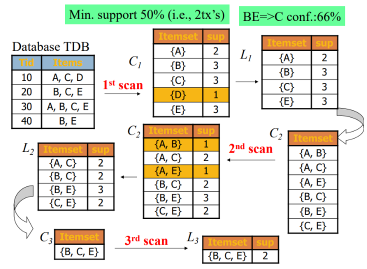


##*Modulo que encuentra los 1-itemset frecuentes escaneando la base de datos,*
imput: 
*   playlists : Lista de transacciones

output
*   c1: Conjunto de 1 elementos candidatos frecuentes





In [ ]:
def crear_C1(playlists):
    C1 = set()
    for t in playlists:
        for item in t:
            item_set = frozenset([item])
            C1.add(item_set)
    return C1

##*Modulo para encontrar candidatos a k_itemsets frecuentes combinando pares de (k-1)_itemsets frecuentes que solo difieran en su ultimo elemento(Los itemsets deben estar ordenados lexicograficamente)*
input:
*   Fk-1 : conjunto que tiene como contenido  conjuntos de los elementos candidatos frecuentes (k-1)

output:
*   Ck: conjunto que tiene todos los conjuntos de elementos k candidatos frecuentes





In [ ]:
def crear_ck(Fksub1, k):
    Ck = set()
    len_Fksub1 = len(Fksub1)
    list_Fksub1 = list(Fksub1)
    for i in range(len_Fksub1):
        for j in range(1, len_Fksub1):
            l1 = list(list_Fksub1[i])
            l2 = list(list_Fksub1[j])
            #ordenamos itemsts de las listas
            l1.sort()
            l2.sort()
            if l1[0:k-2] == l2[0:k-2]:
                Ck_item = list_Fksub1[i] | list_Fksub1[j]
                # pruning si cumple con los criterios de apriori agregamos 
                for item in Ck_item:
                  sub_Ck = Ck_item - frozenset([item])
                  if sub_Ck in Fksub1:
                    Ck.add(Ck_item)
    return Ck


##*Modulo que realiza el conteo , halla soporte del itemset candidato y realiza la condicional si cumple el criterio  minsup.*

input:
*   playlists: lista de transacciones, en el cual cada trans contiene varios elementos
*   ck: conjunto que tiene todos los conjuntos de elementos k candidatos frecuentes
*   min_support: soporte minimo
*   Datos_elemeFrec_Soporte: diccionario el cual consta de clave(conjunto de elementos frecuentes) y valor(soporte)

output:

*   Fk: contiene todos los conjuntos de elementos k frecuentes





In [ ]:
def get_frequent_itemstetsk_by_Ck(playlists, Ck, min_support, Datos_elemFrec_Soporte):
    # En Fk almacenaremos los elementos frecuentes
    Fk = set()
    item_count = {}
    for t in playlists:
        for item in Ck:
            if item.issubset(t):
                if item not in item_count:
                    item_count[item] = 1
                else:
                    item_count[item] += 1
    t_num = float(len(playlists))
    for item in item_count:
        if (item_count[item] / t_num) >= min_support:
            Fk.add(item)
            Datos_elemFrec_Soporte[item] = item_count[item] / t_num
    return Fk

##***1.Modulo que genera todos los conjuntos de elementos frecuentes.Recibe la esctructura de datos que contiene a las playlists y retorna una estructura con los itemsets fre-cuentes, bajo un umbral mínimo de confianza***

input:
*   playlists: una lista de transacciones.  
*   min_support: el soporte mínimo.

output:
*   frequent_itemsets: La lista de Fk.
*   Datos_elemFrec_Soporte: un diccionario para un mejor control de datos
    

In [ ]:
def get_frequent_itemsets(playlists,min_support):
    Datos_elemFrec_Soporte = {}
    C1 = crear_C1(playlists)
    frequent_itemsets1 = get_frequent_itemstetsk_by_Ck(playlists, C1, min_support, Datos_elemFrec_Soporte)
    Fksub1 = frequent_itemsets1.copy()
    frequent_itemsets = []
    frequent_itemsets.append(Fksub1)
    
    for i in range(2, 7):
        Ci = crear_ck(Fksub1, i)
        frequent_itemsetsi = get_frequent_itemstetsk_by_Ck(playlists, Ci, min_support, Datos_elemFrec_Soporte)
        Fksub1 = frequent_itemsetsi.copy()
        frequent_itemsets.append(Fksub1)
    return frequent_itemsets, Datos_elemFrec_Soporte

##***2.Generacion de reglas de asociacion***
input:

*   frequent_itemsets : lista de elementos frecuentes
*   Datos_elemFrec_Soporte: un diccionario. La clave es el conjunto de elementos frecuentes y el valor es el soporte.
*   min_conf: Confianza mínima.

output:

*   lista_reglas_asociacion: lista de reglas de asociacion






In [ ]:
def generate_association_rules(frequent_itemsets, Datos_elemFrec_Soporte, min_conf,lift):
    lista_reglas_asociacion = []
    sub_set_list = []
    for i in range(0, len(frequent_itemsets)):
        for freq_set in frequent_itemsets[i]:
            for sub_set in sub_set_list:
                if sub_set.issubset(freq_set):
                    conf = Datos_elemFrec_Soporte[freq_set] / Datos_elemFrec_Soporte[freq_set - sub_set]
                    regla_asociacion = (freq_set - sub_set, sub_set, conf)
                    if conf >= min_conf and regla_asociacion not in lista_reglas_asociacion:
                        # print freq_set-sub_set, " => ", sub_set, "conf: ", conf
                        lista_reglas_asociacion.append(regla_asociacion)
            sub_set_list.append(freq_set)
    return lista_reglas_asociacion

#**Programa principal**

In [ ]:
playlists = Listar_datos()
frequent_itemsets, Datos_elemFrec_Soporte = get_frequent_itemsets(playlists, min_support=0.2)
regla_asociacions_list = generate_association_rules(frequent_itemsets, Datos_elemFrec_Soporte, min_conf=0.5)
for Fk in frequent_itemsets:
  #listamos en un diccionario todos los items frecuentes y el soporte obtenido
  print("frequent " + str(len(list(Fk)[0])) + "-itemsets\t\tsupport")
  for freq_set in Fk:
    print(freq_set, Datos_elemFrec_Soporte[freq_set])

frequent 1-itemsets		support
frozenset({'Ordinary Love'}) 0.2
frozenset({'Toxic'}) 0.2
frozenset({'I am the Doctor in Utah'}) 0.2
frozenset({'Fortune Only'}) 0.2
frozenset({'Concerning Hobbits (The Lord of the Rings)'}) 0.2
frozenset({'U.N. Owen Was Her? (Remix)'}) 0.2
frozenset({'I Don\'t Want to Miss a Thing - From the Touchstone film, "Armageddon"'}) 0.2
frozenset({'Angel'}) 0.2
frozenset({'The Blood of Cuchulainn (The Boondock Saints)'}) 0.2
frozenset({"Very Bloody Tears (Castlevania II: Simon's Quest)"}) 0.2
frozenset({'My Boo'}) 0.2
frozenset({'Torn'}) 0.2
frozenset({'Sea Song'}) 0.2
frozenset({'Jealousy - Remastered Single Version'}) 0.2
frozenset({'1979'}) 0.2
frozenset({'Danse macabre'}) 0.2
frozenset({'Like You'}) 0.2
frozenset({'FXXK WIT US'}) 0.2
frozenset({'BREATHE'}) 0.2
frozenset({"He's a Pirate (Pirates of the Caribbean)"}) 0.2
frozenset({'I Will Show You'}) 0.2
frozenset({'Waterfalls'}) 0.2
frozenset({'Lose Control (feat. Ciara & Fat Man Scoop)'}) 0.2
frozenset({'Servi

##*Cada de regla de asociacion se encuentra en un diccionario por separado asi como tambien se muestra la confidencia*

In [ ]:
print("REGLAS DE ASOCIACION")
for item in regla_asociacions_list:
  print(item[0], "=>", item[1], "conf: ", item[2])

Se han truncado las últimas 5000 líneas del flujo de salida.
frozenset({'The Blood of Cuchulainn (The Boondock Saints)', "Very Bloody Tears (Castlevania II: Simon's Quest)", 'I am the Doctor in Utah'}) => frozenset({'U.N. Owen Was Her? (Remix)', "He's a Pirate (Pirates of the Caribbean)", 'Libera Me From Hell (Tengen Toppa Gurren Lagann)'}) conf:  1.0
frozenset({"He's a Pirate (Pirates of the Caribbean)", 'The Blood of Cuchulainn (The Boondock Saints)', "Very Bloody Tears (Castlevania II: Simon's Quest)"}) => frozenset({'U.N. Owen Was Her? (Remix)', 'Libera Me From Hell (Tengen Toppa Gurren Lagann)', 'I am the Doctor in Utah'}) conf:  1.0
frozenset({"He's a Pirate (Pirates of the Caribbean)", 'The Blood of Cuchulainn (The Boondock Saints)', 'I am the Doctor in Utah'}) => frozenset({'U.N. Owen Was Her? (Remix)', "Very Bloody Tears (Castlevania II: Simon's Quest)", 'Libera Me From Hell (Tengen Toppa Gurren Lagann)'}) conf:  1.0
frozenset({'U.N. Owen Was Her? (Remix)', "Very Bloody Tears 



```
# Otra manera de salida pero se pierden casi 5000 reglas
contador=1
for item in regla_asociacions_list:
    pair = item[0] 
    items = [x for x in pair]
    print(contador)
    print("Regla: " + str(item[0]), "=>", str(item[1]), "conf: ", str(item[2]))
    print("=====================================")
    contador=contador+1



##*Evaluación de Patrones*




```
Al reducir la data se nos hace complicado un mejor  
analisis,ya que  en este caso los resultados nos 
muestran que todas las asociaciones tienen el soporte de 0.2 
medida por lo que todas pasan una de las medidas de calidad(SOPORTE)
En el siguiente paso procederemos a analizar mejor las reglas
```



##**Teniendo como confidence 0.5 los resultados obtenidos nos filtran las reglas con confianza 1.0**

```
 Estas reglas fue seleccionadas con interes porque las canciones tienen el genero:

I'll Show You  pop 

take me out    rock, punk

FXXK WIT US    kpop

Spring Day     kpop

Ordinary Love  Pop rock, 


Hey Ya        hip-hop, rap

Toxic          pop

t Wasn't Me    reggae 

Buttons         dance-pop 

============================REGLAS========================
1. {'BREATHE', 'Spring Day', 'Ordinary Love'} => {'I Will Show You', 'FXXK WIT US', 'Take Me'} conf:  1.0  sup=0.2

2. {'Hey Ya! - Radio Mix / Club Mix'} => frozenset{"It Wasn't Me", 'Yeah!', 'Toxic', 'Buttons', 'My Boo'}   conf:  1.0   sup=0.2

3. {'Like You'}) => {'Ah-Choo', 'I Will Show You', 'FXXK WIT US', 'Ordinary Love', 'BREATHE'} conf:  1.0    sup=0.2

4. {'BREATHE'} => {'Ah-Choo', 'I Will Show You', 'FXXK WIT US', 'Like You', 'Ordinary Love'} conf:  1.0   sup=0.2

=========================INTERPRETRACION==================

1. Las personas que escuchan Breathe , Spring Day , Ordinary Love que son musicas del estilo kpop escuchan tambien musica del estilo pop como:I Will Show You, FXXK WIT US, Take Me

2. De manera similar en este punto 2

3. Las personas que escuchan las canciones Like You de Maroo5 tambien escuchan musica de Justin Bieber 'I Will Show You'

4. Las personas que escuchan 'BREATHE' de Taylor Switf del tipo pop escuchan tambien Ordinary Love genero porp rock